In [25]:
#TASK1
import pandas as pd  
data = pd.read_csv(r"C:\Users\USER\Downloads\Titanic-Dataset.csv")  
print(data.head())  


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [27]:
# Check for missing values in each column
print(data.isnull().sum())  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
# Fill missing values in the 'Age' column with the median value
data["Age"].fillna(data["Age"].median(), inplace=True)  

# Fill missing values in 'Embarked' with the most common value (mode)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)  

# Drop the 'Cabin' column since it has too many missing values
data.drop(columns=["Cabin"], inplace=True)  
# Check if missing values are handled
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_18364\100765701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_18364\100765701.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [31]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)  

# Show the new number of rows and columns
print(data.shape)  


(891, 11)


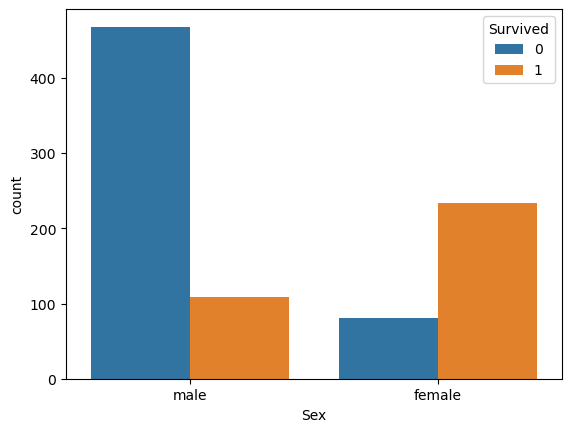

In [46]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Create a count plot
sns.countplot(x="Sex", hue="Survived", data=data)  

# Show the plot
plt.show()  


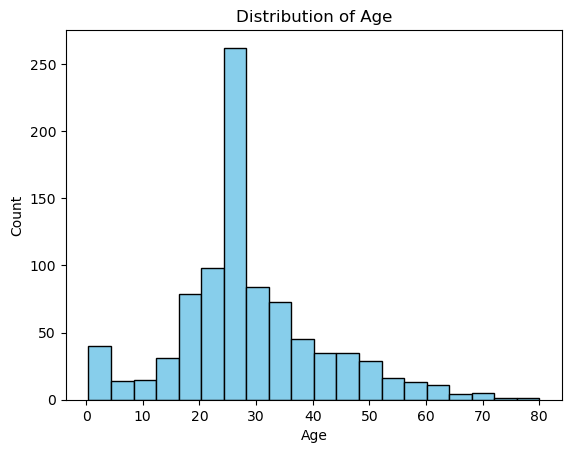

In [48]:
# Plot histogram for Age distribution
plt.hist(data["Age"], bins=20, color="skyblue", edgecolor="black")  

# Labels
plt.xlabel("Age")  
plt.ylabel("Count")  
plt.title("Distribution of Age")  

# Show the plot
plt.show()  


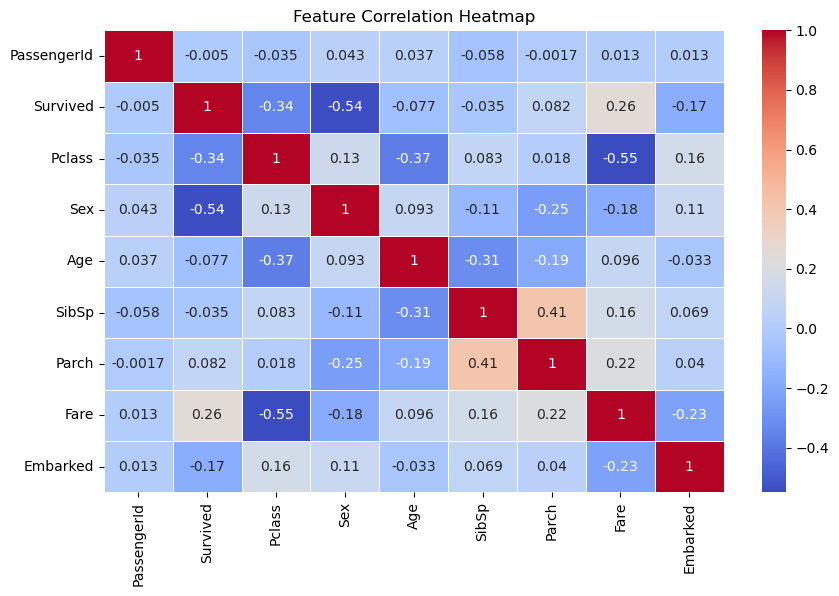

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

# Convert categorical data (Sex, Embarked) into numeric form
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})
data["Embarked"] = data["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Final Step: Summary of Insights
After analyzing the dataset, we can summarize our findings:

Observations:

More women survived than men.
People with a higher ticket class (Pclass 1) had a better survival rate.
The Age distribution shows most passengers were between 20-40 years old.
Fare has some outliers, which means some passengers paid very high amounts.